# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')
cData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supervised Learning - Foundations _03/Project- Recell/used_device_data.csv')

Mounted at /content/drive


## Data Overview

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [14]:
# shape of the dataset
cData.shape

(3454, 15)

Description:

* There are 3454 rows and 15 columns in the given dataset.



In [15]:
# First few rows of the data set
cData.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [16]:
# View last 5 rows
cData.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [17]:
#Checking column types and number of values
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Description:
* Total 3454 rows and can observe some columns having missing values.
* brand_name, os, 4g, 5g columns are cateogorical (object type) whereas most other columns are numerical in nature('int64' or 'float64' type).

In [18]:
# Checking statistical summary of the dataset
cData.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


Description:

* Statistical summary (count,mean,standard deviation,minimum and maximum) of the numerical values of dataset are returned

In [19]:
cData.describe(include='object')

,brand_name,os,4g,5g
count,3454,3454,3454,3454
unique,34,4,2,2
top,Others,Android,yes,no
freq,502,3214,2335,3302


* Statistical summary(count, unique, top and freq) for each categorical variable in a dataset is returned

In [20]:
# Duplicate values in dataset
cData.duplicated().unique()

array([False])

* There are no duplicate rows in the dataset.

In [21]:
# Checking missing values
cData.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


Description:

* There are missing values in the given dataset.

In [22]:
# creating a copy of the data so that original data remains unchanged
df = cData.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [23]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [24]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()

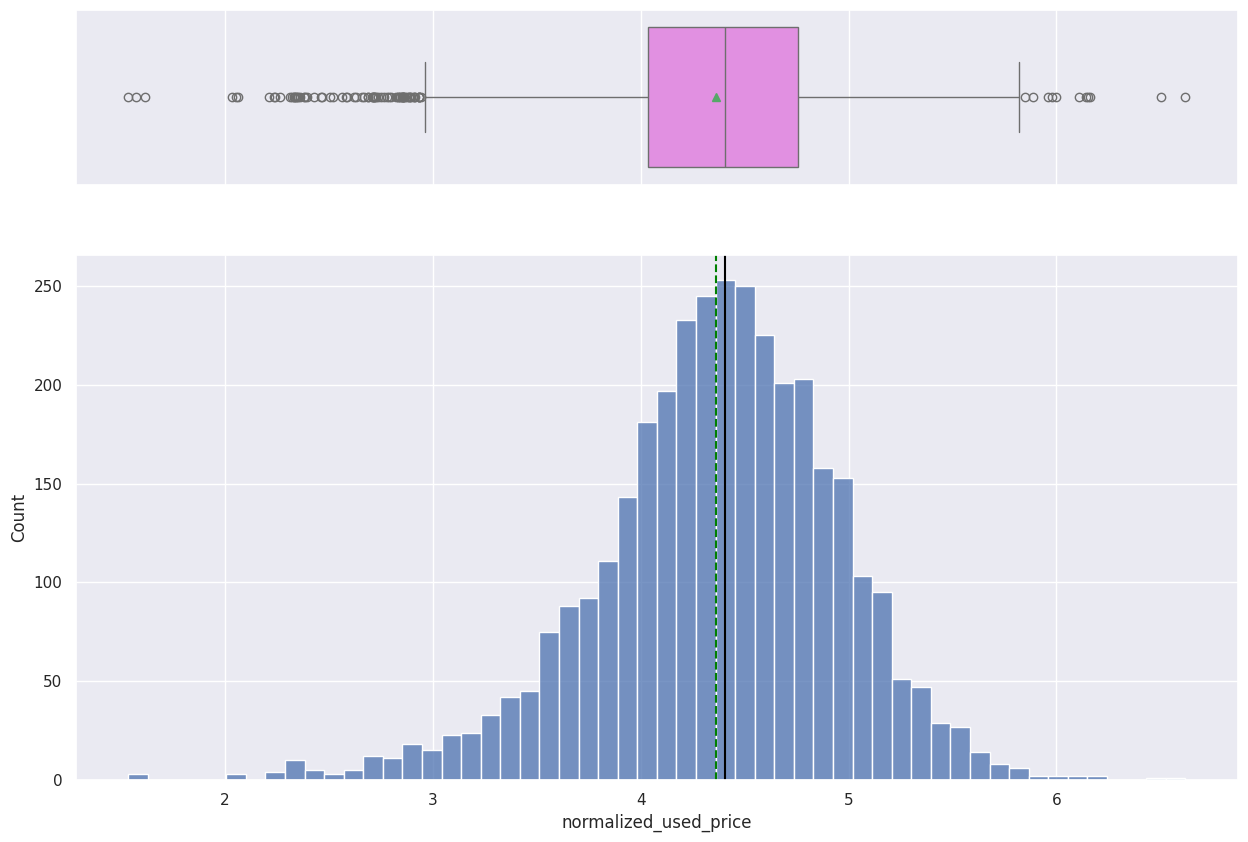

In [25]:
# normalized used price
histogram_boxplot(df, "normalized_used_price")

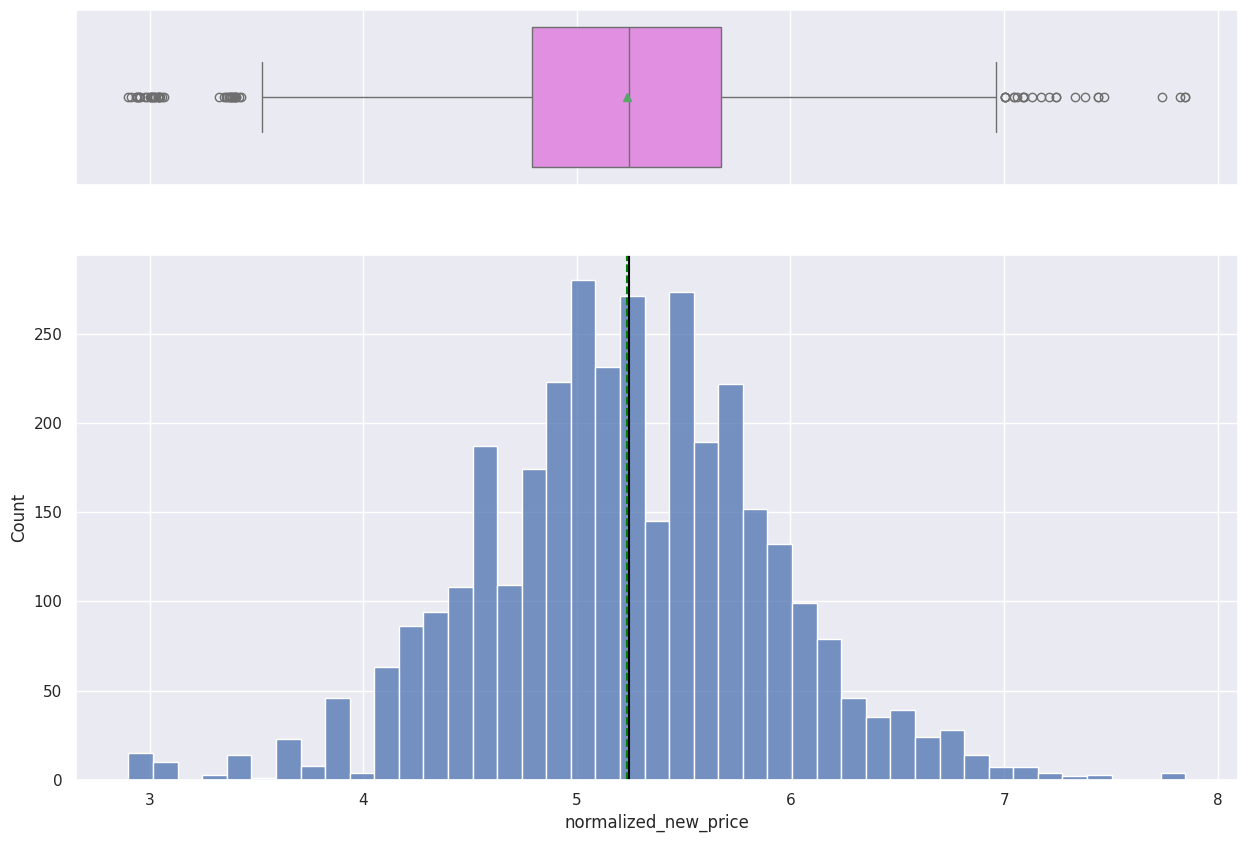

In [26]:
# normalized_new_price
histogram_boxplot(df, "normalized_new_price")

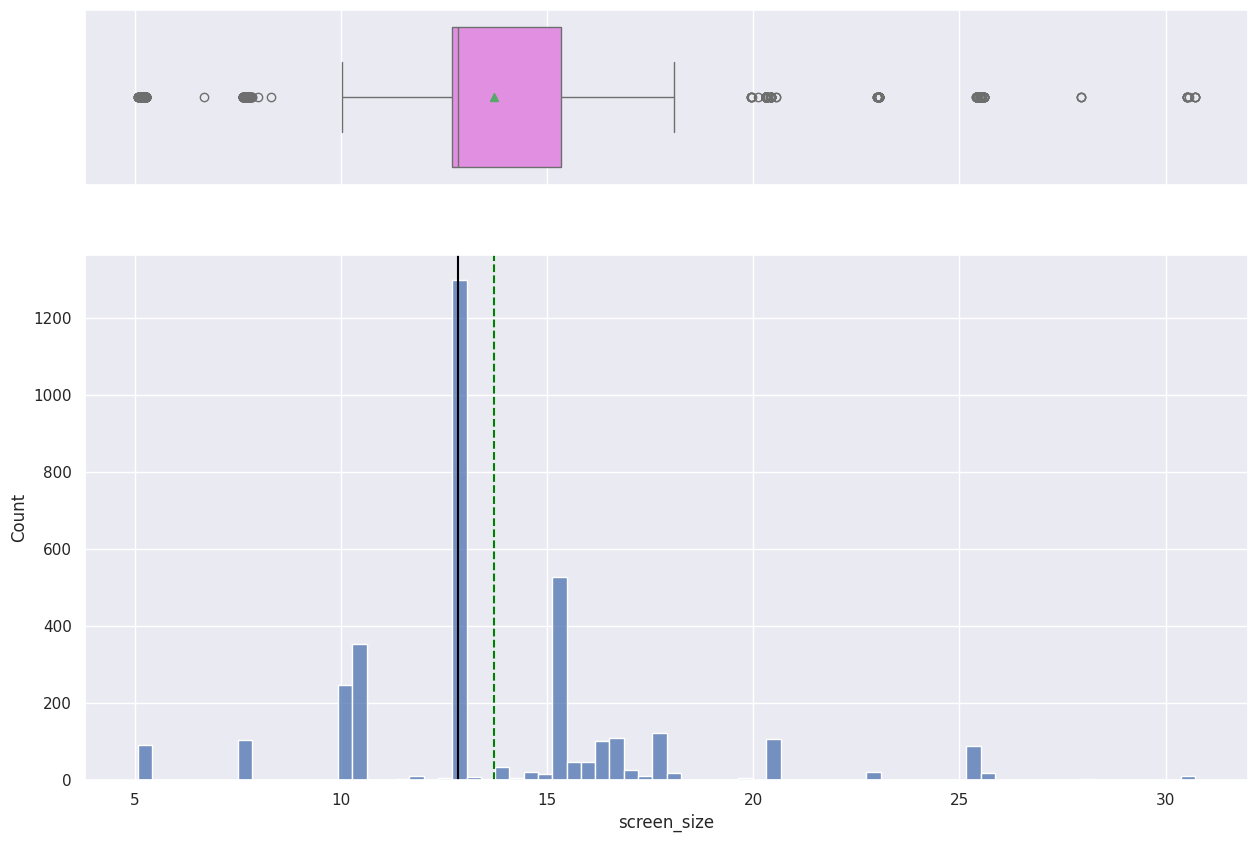

In [27]:
# screen_size
histogram_boxplot(df, "screen_size")

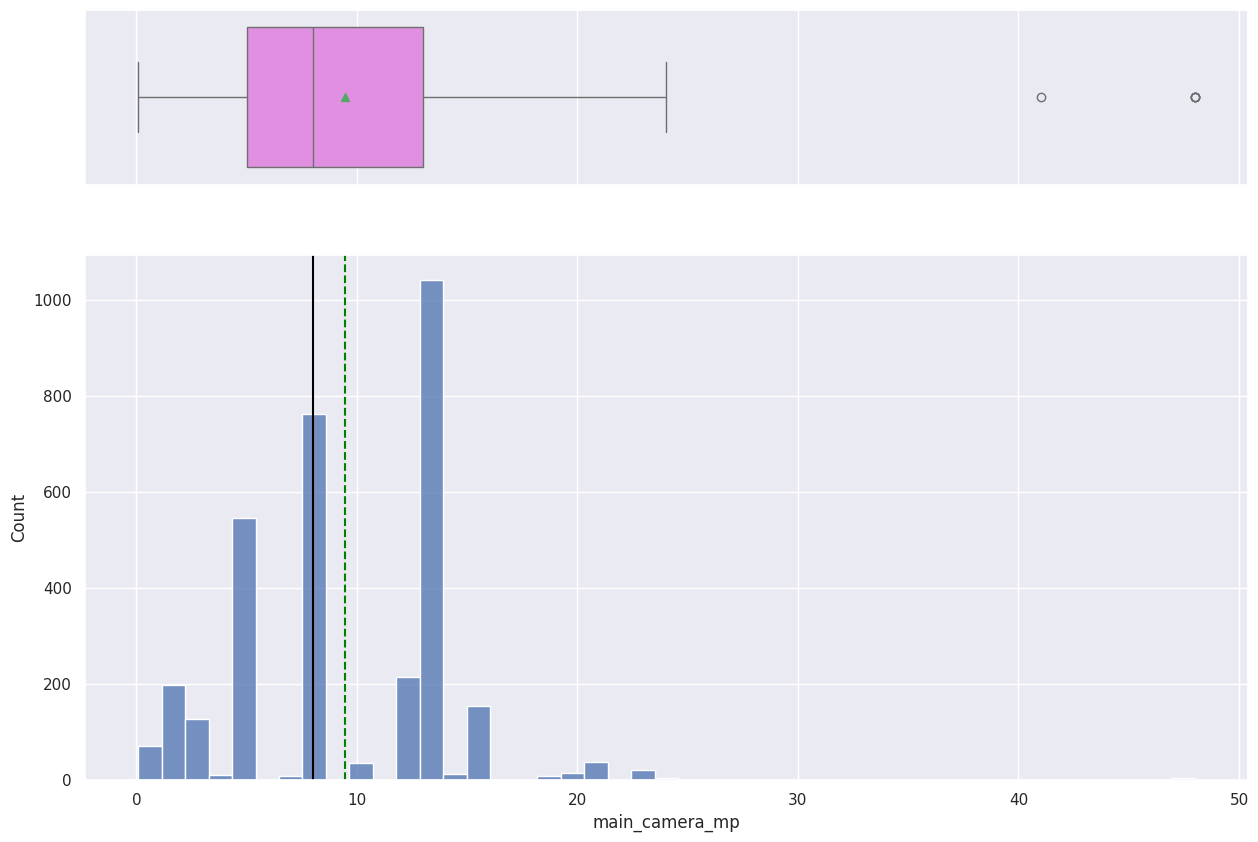

In [28]:
#main_camera_mp
histogram_boxplot(df, "main_camera_mp")

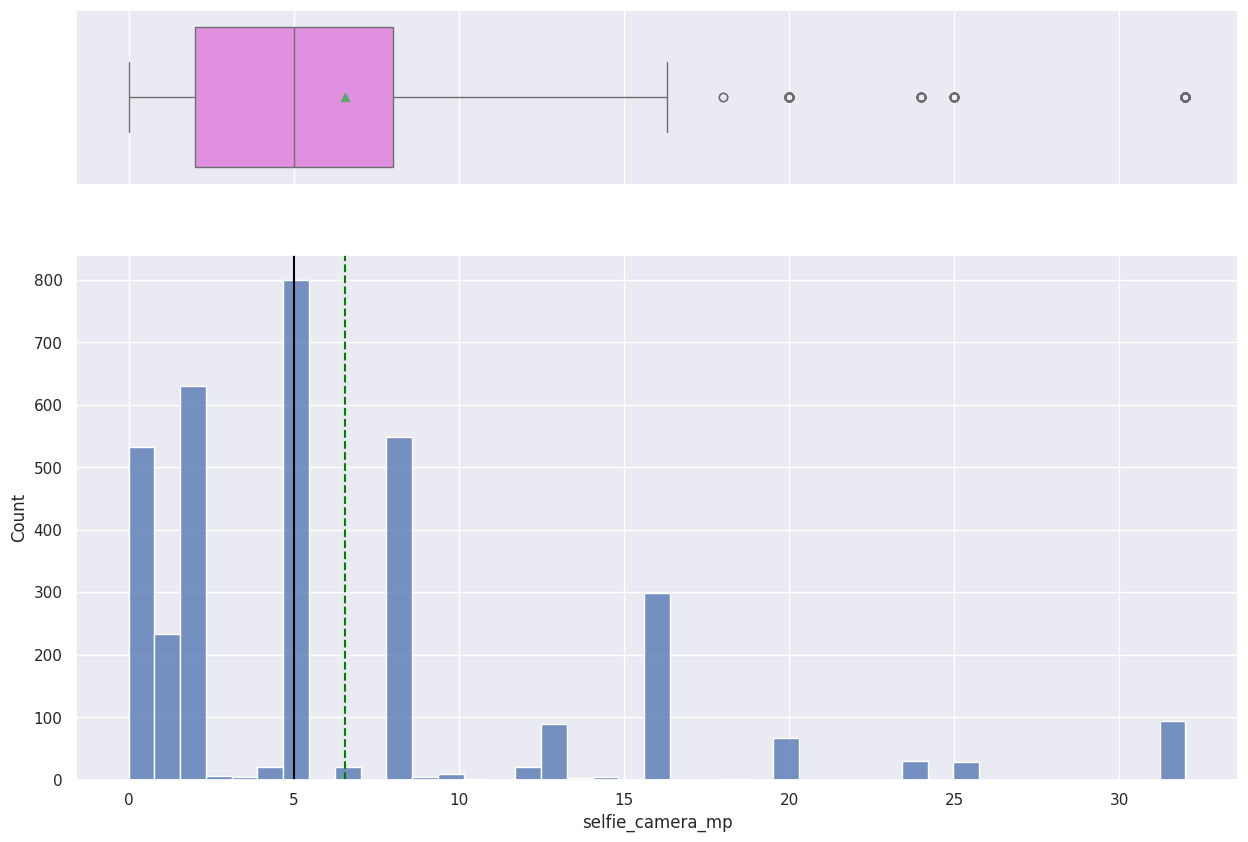

In [29]:
# selfie_camera_mp
histogram_boxplot(df, "selfie_camera_mp")

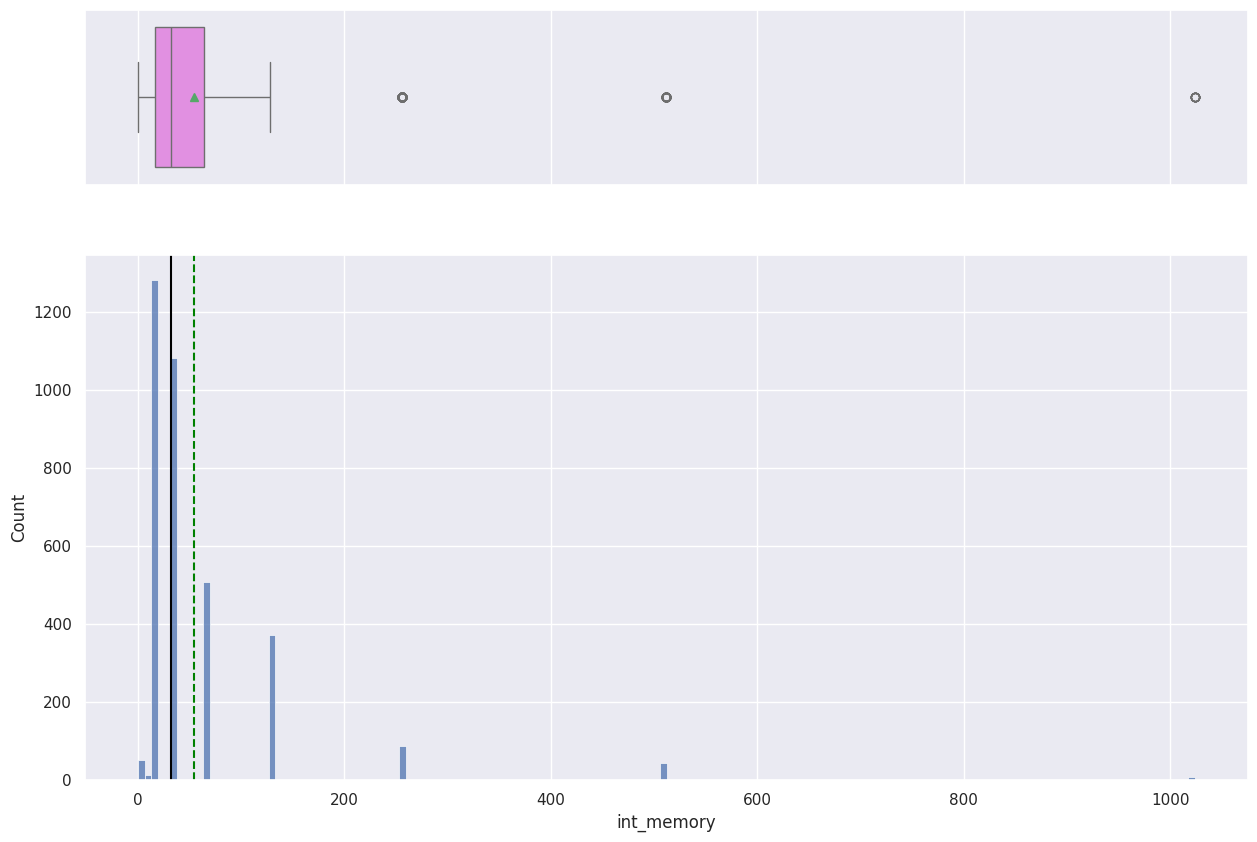

In [30]:
# int_memory
histogram_boxplot(df, "int_memory")

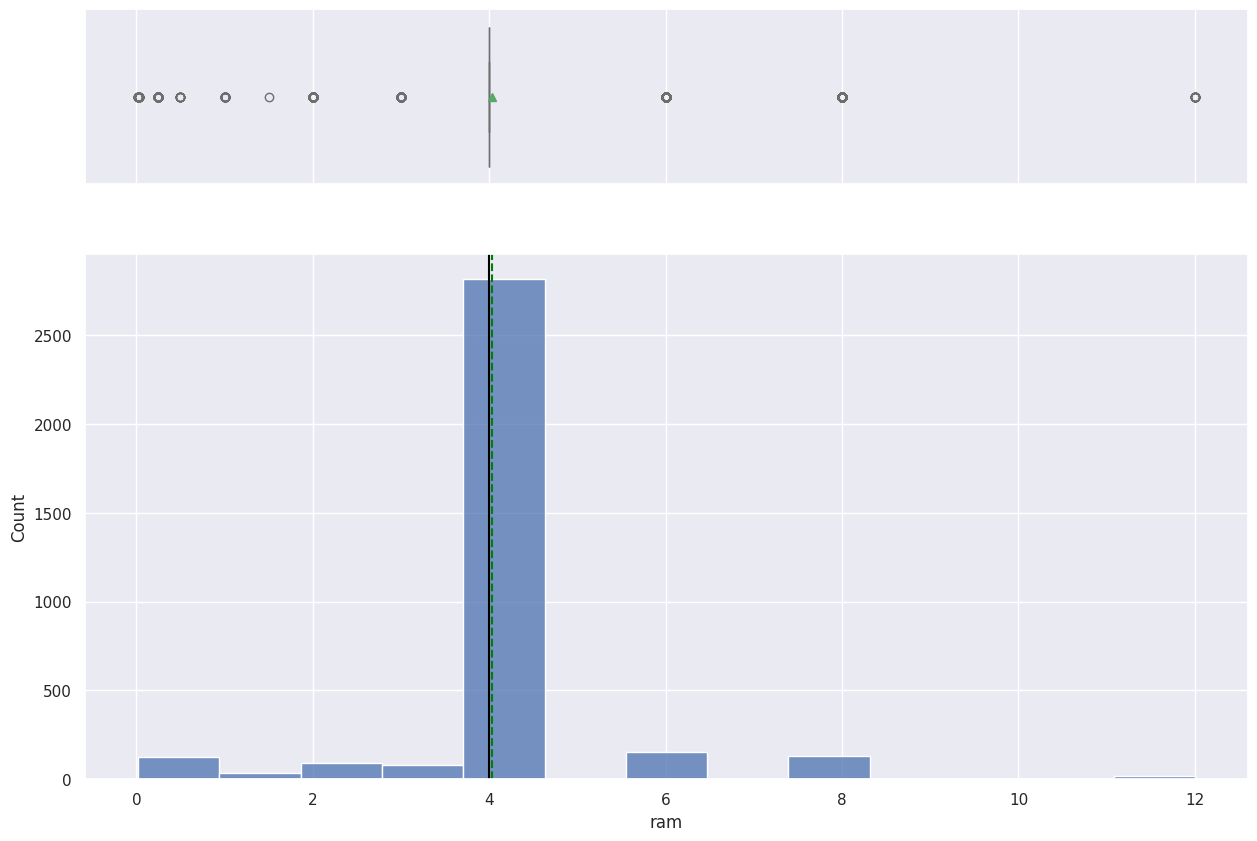

In [31]:
# ram
histogram_boxplot(df, "ram")

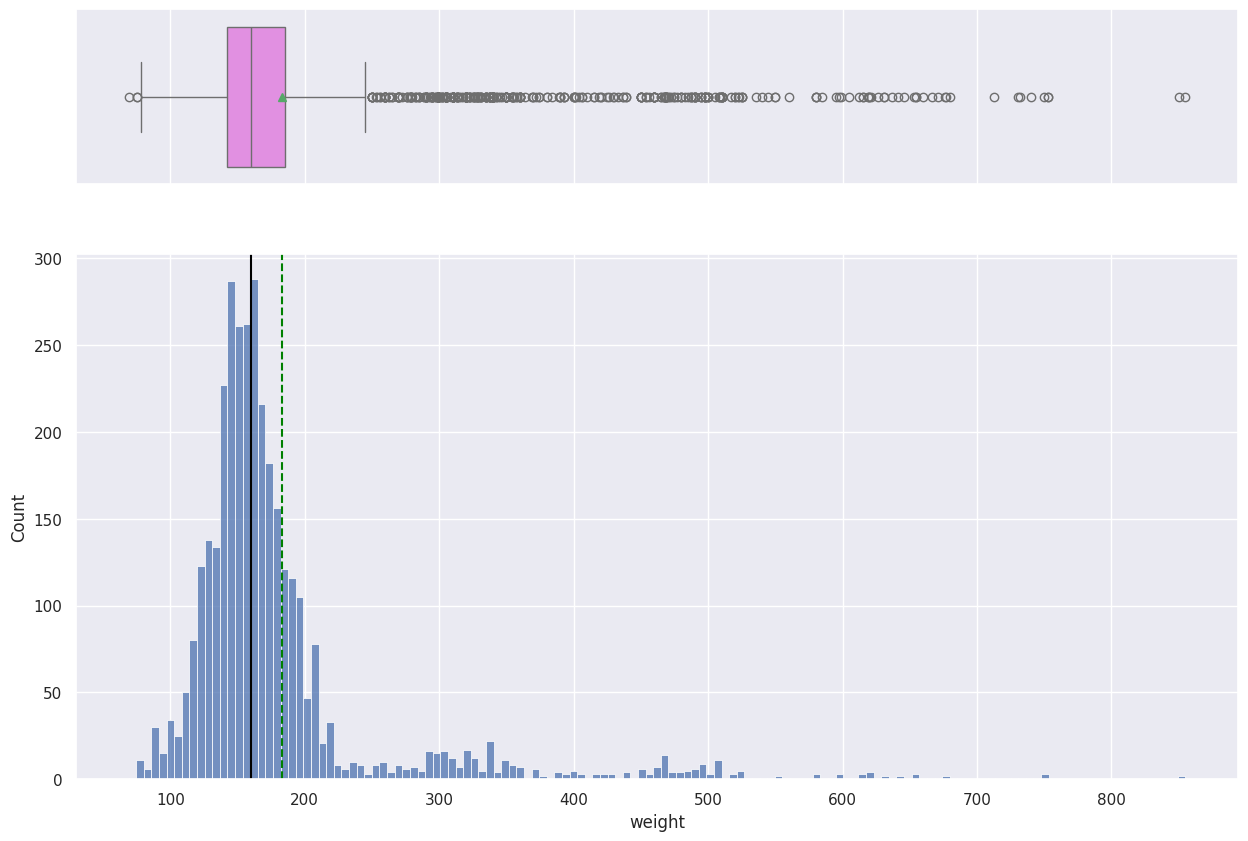

In [32]:
# weight
histogram_boxplot(df, "weight")

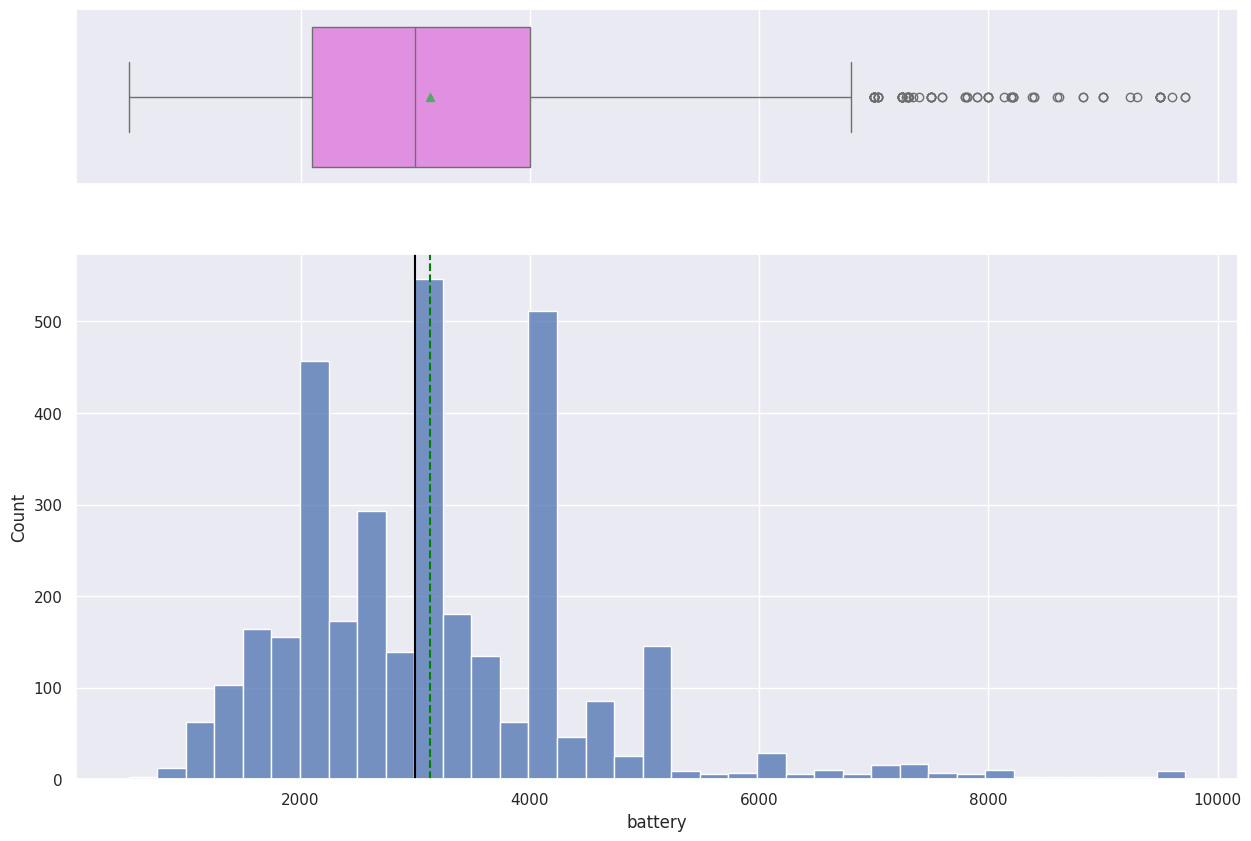

In [33]:
# battery
histogram_boxplot(df, "battery")

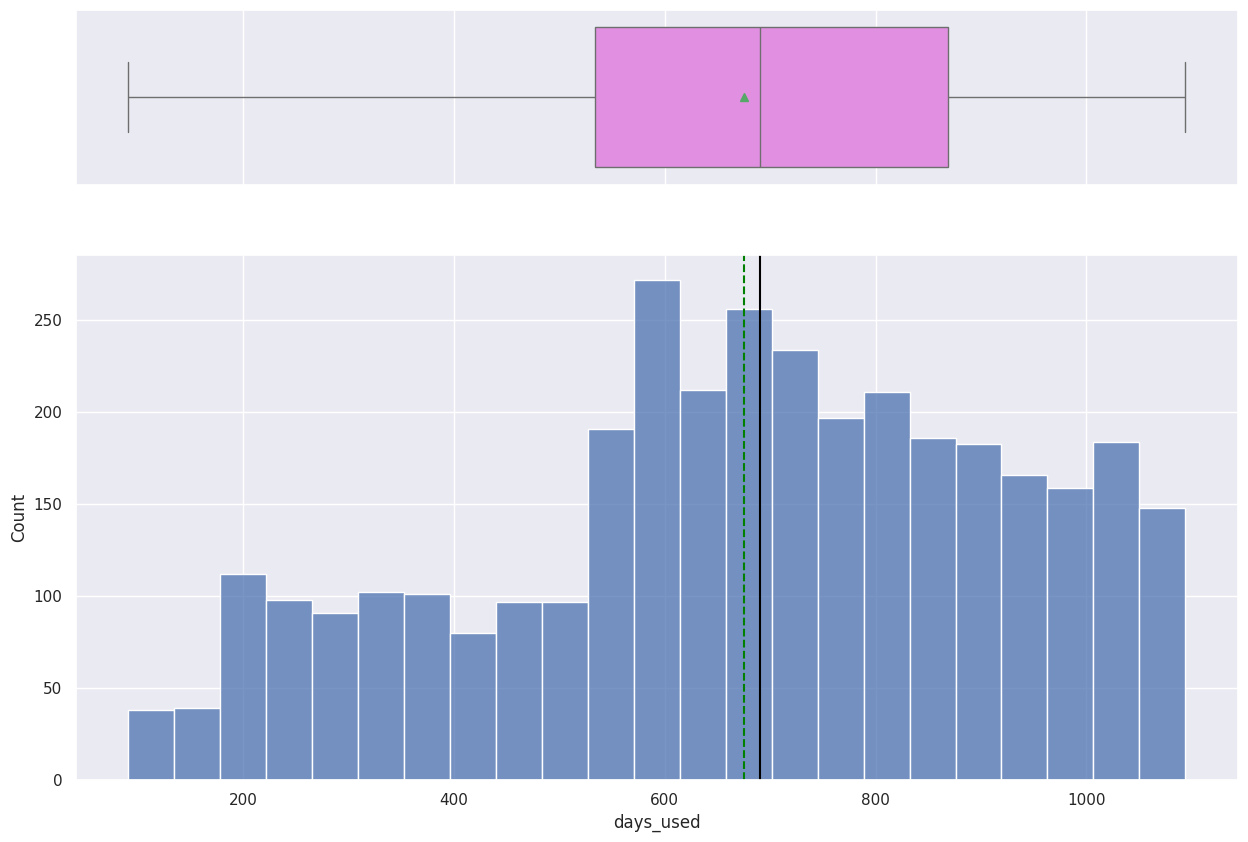

In [34]:
# days_used
histogram_boxplot(df, "days_used")

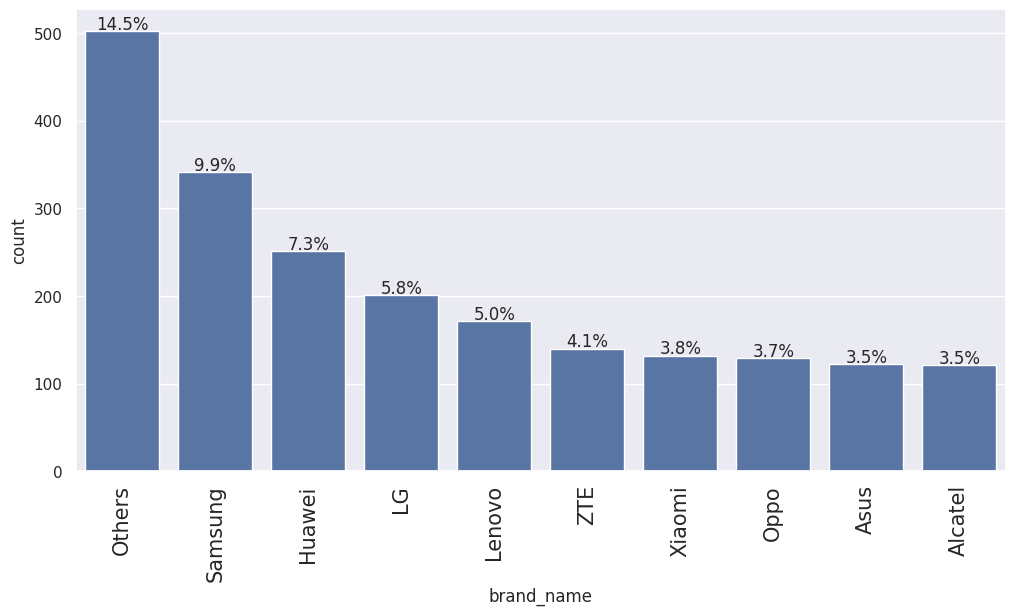

In [35]:
# brand_name
labeled_barplot(df, "brand_name", perc=True, n=10)

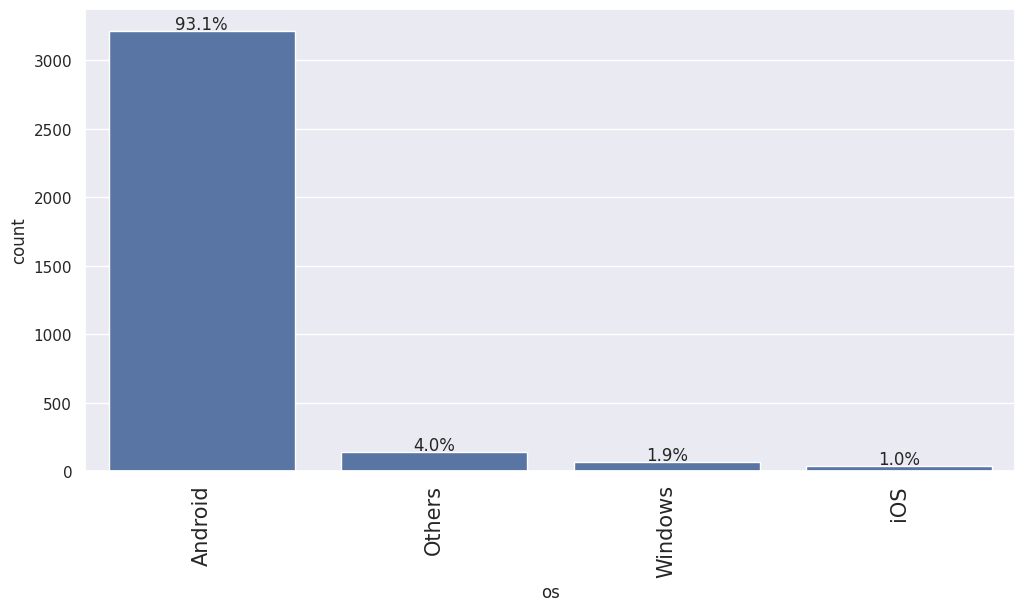

In [36]:
# os
labeled_barplot(df, "os", perc=True, n=10)

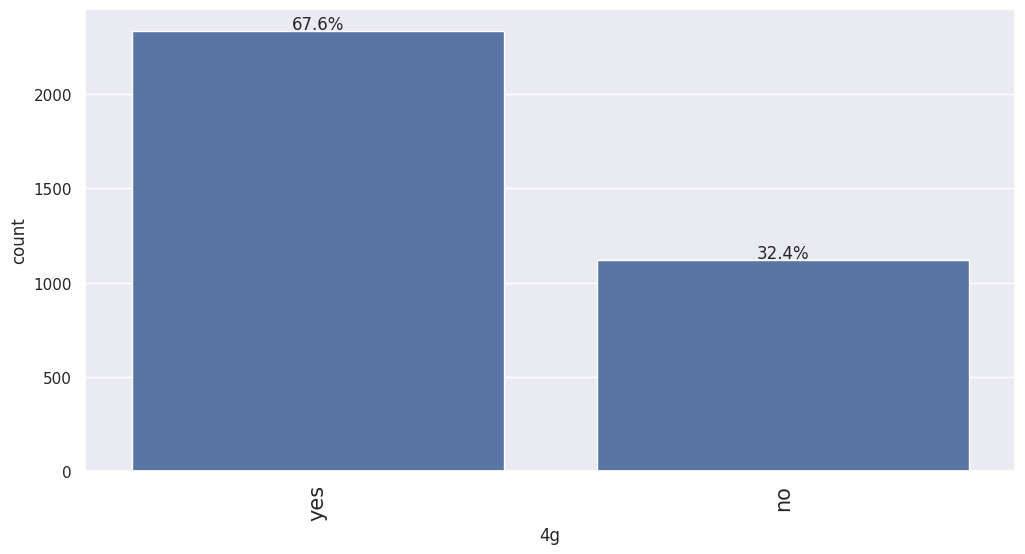

In [37]:
# 4g
labeled_barplot(df, "4g", perc=True, n=10)

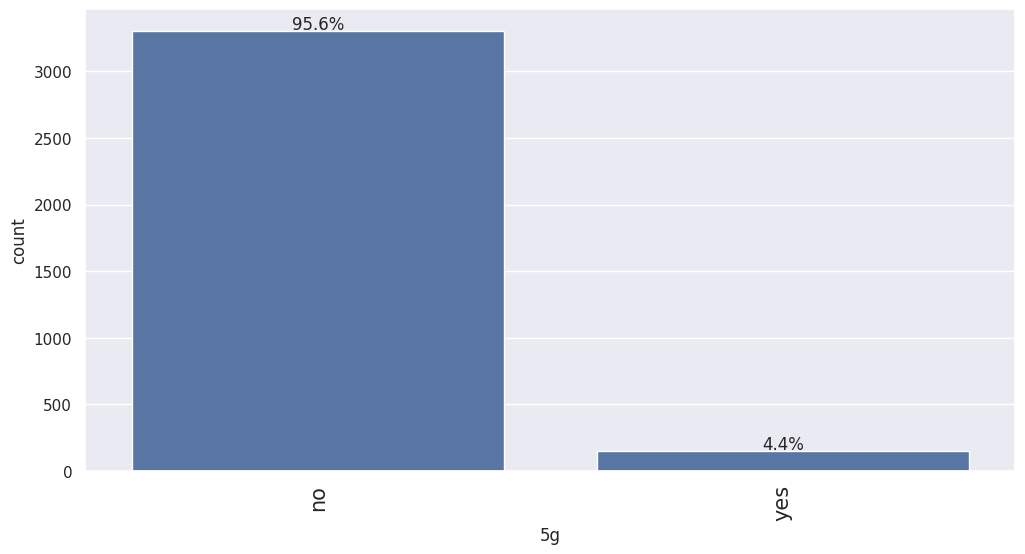

In [38]:
# 5g
labeled_barplot(df, "5g", perc=True, n=10)

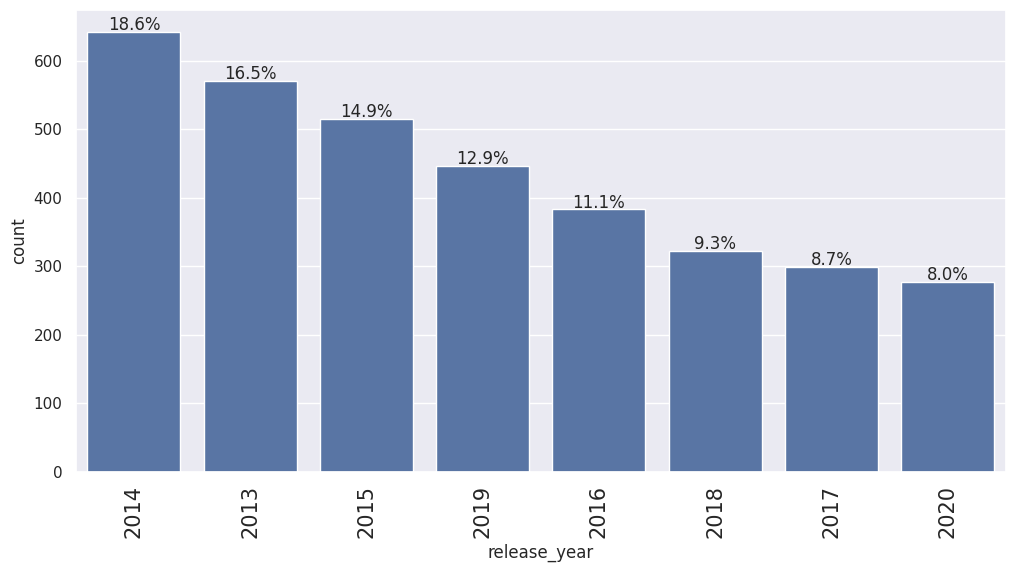

In [39]:
#release_year
labeled_barplot(df, "release_year", perc=True, n=10)

Observations:

* All the distributions have outliers.
* normalized_used_price & normalized_new_price looks normally distributed but other distribution are not normally distributed.


**Bivariate Analysis**

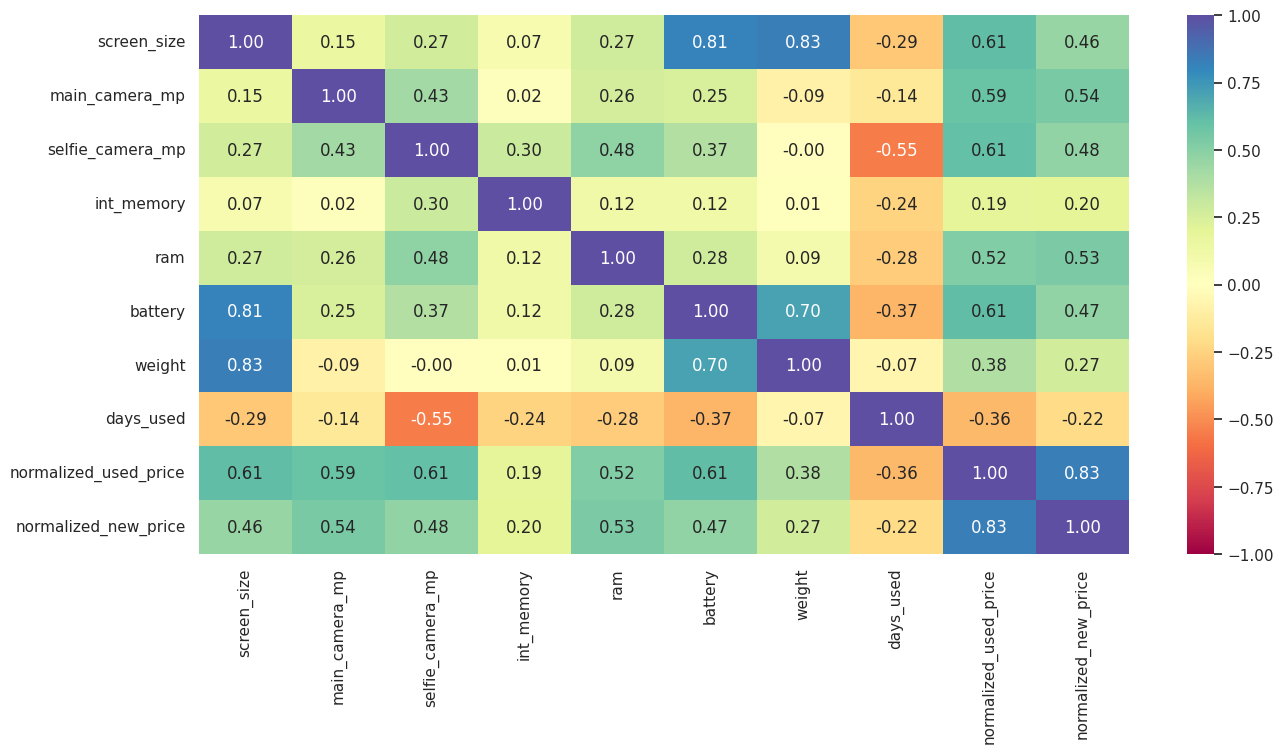

In [40]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


Observations:

* Listed are some of the attributes that have high correlation with the normalized_used_price - **normalized_new_price, screen_size, battery, selfie_camera_mp, main_camera_mp, ram.**

**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

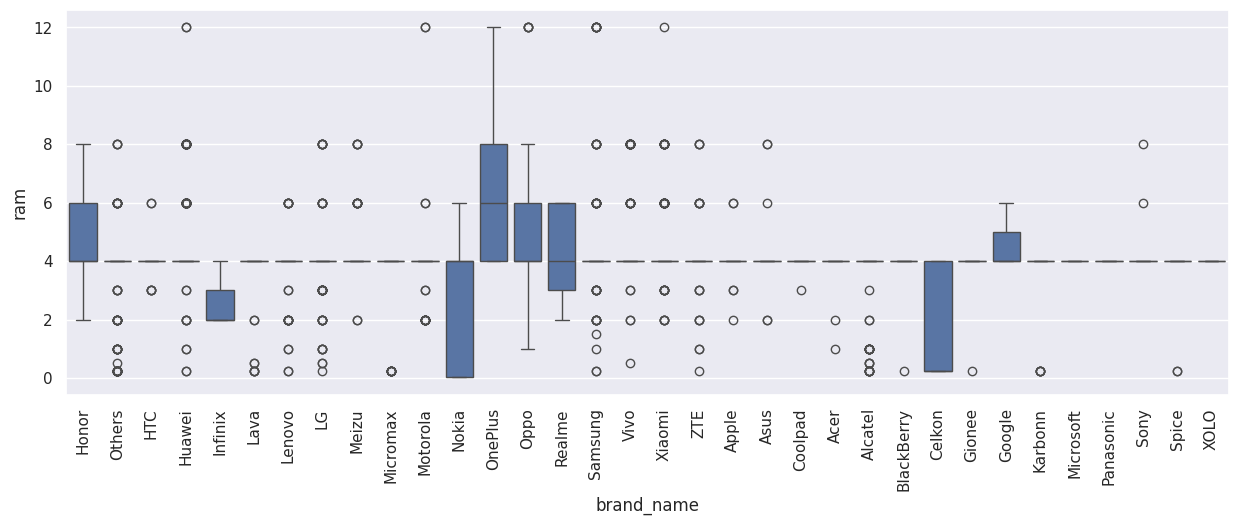

In [41]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

Observation:
* OnePlus brand has the most RAM and Celkon brand has the least RAM.
* There are many outliers.

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [42]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

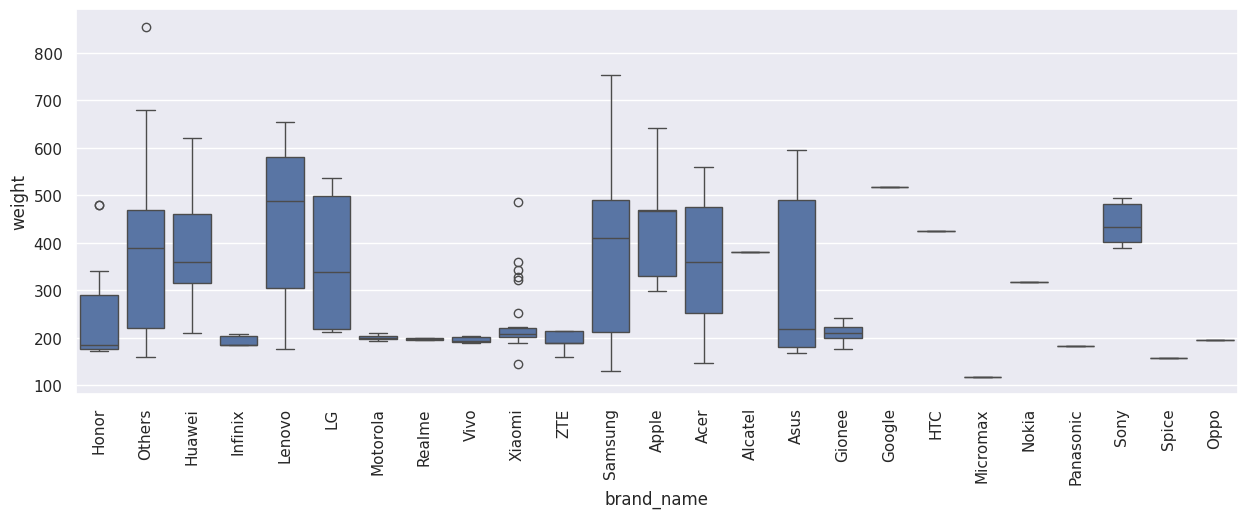

In [43]:
# brand_name vs weight analysis
plt.figure(figsize=(15, 5))
sns.boxplot(df_large_battery, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

Observation:

* Google brand has the heaviest devices and Micromax brand has the lightest devices.

**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [44]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

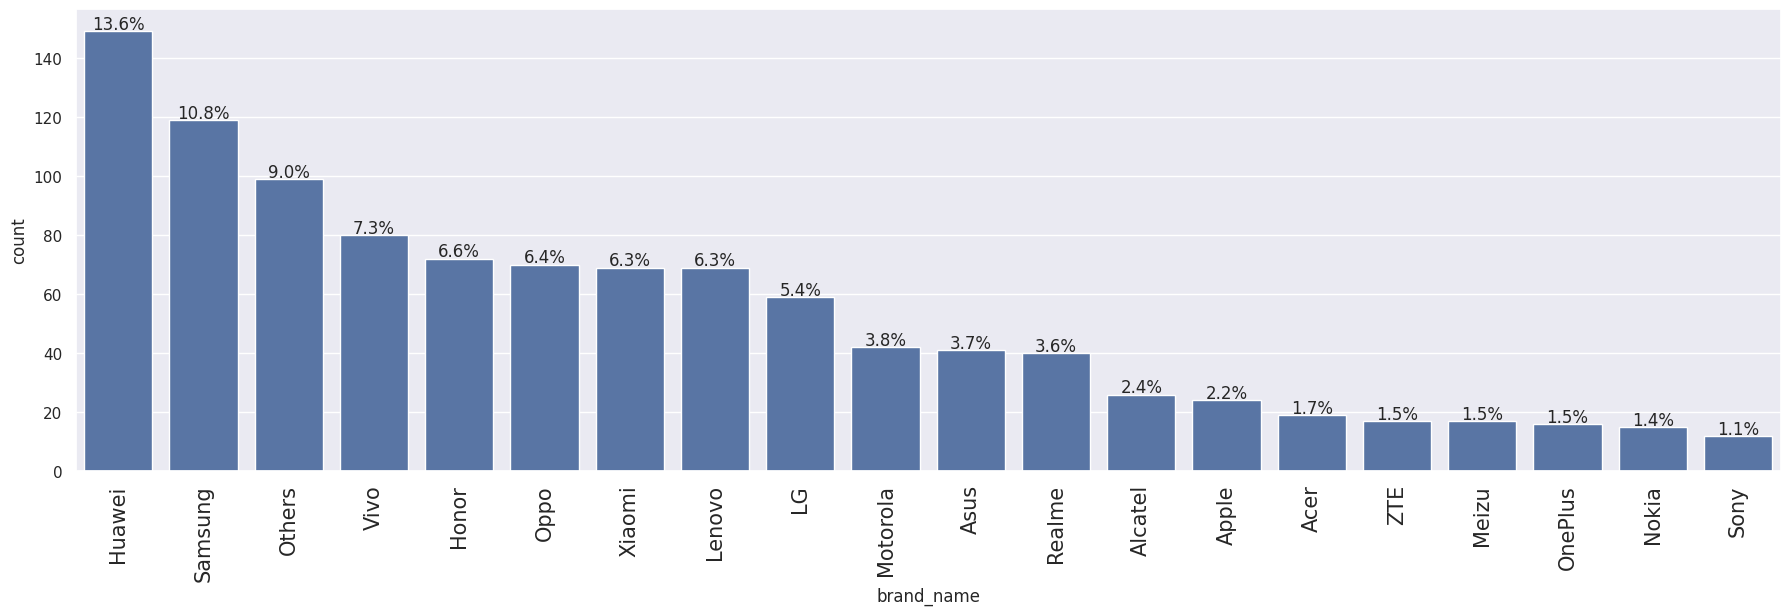

In [45]:
labeled_barplot(df_large_screen, "brand_name", perc=True, n=20)

Observations:
* Huawei brand has the highest number of devices with screen sizes larger than 6 inches, which is 13.6% of the market,followed by Samsung(10.8%) and other brands.

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [46]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

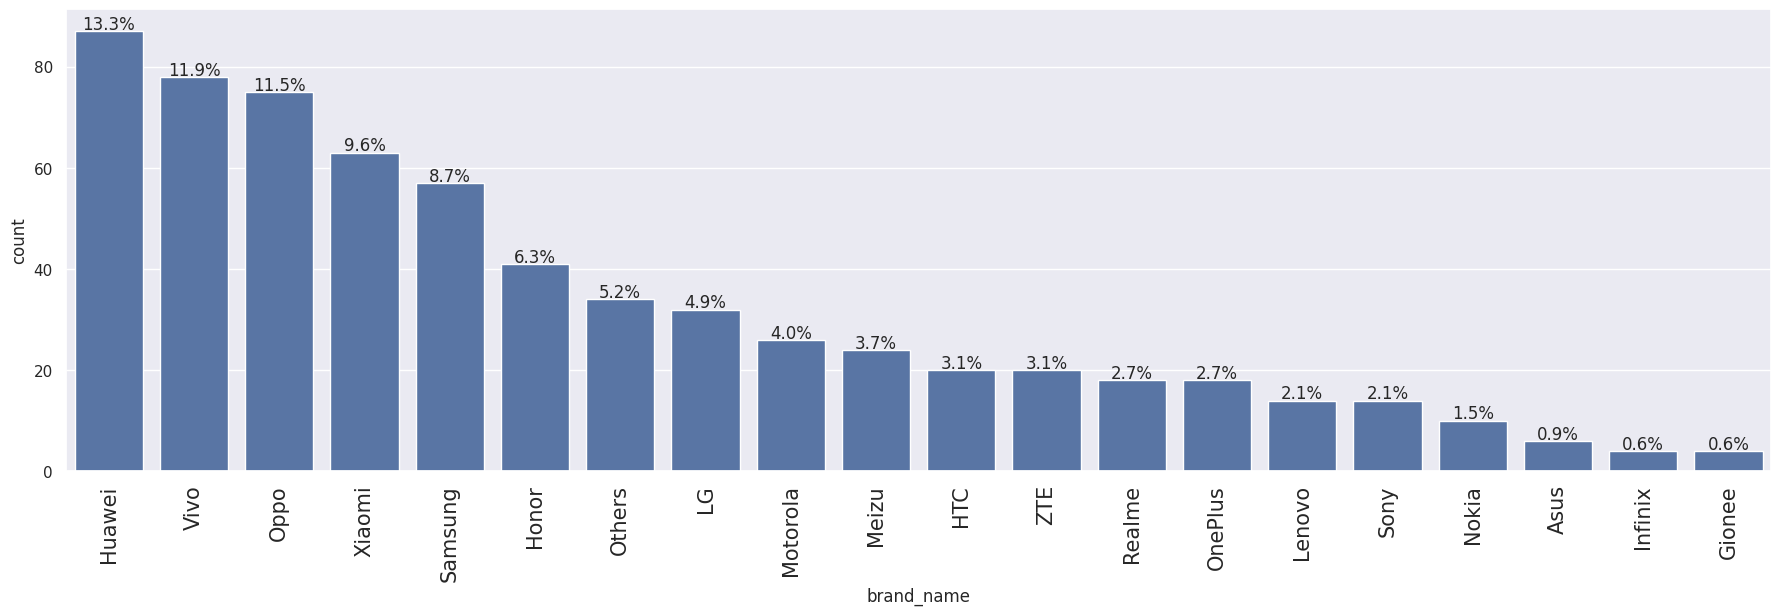

In [47]:
labeled_barplot(df_selfie_camera, "brand_name", perc=True, n=20)

Observations:

* Huawei brand has the highest number of devices with selfie cameras with more than 8 MP , which takes up 13.3% of the market, followed by Vivo, Oppo, Xiaomi etc..

**Let's do a similar analysis for rear cameras.**

- Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [48]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

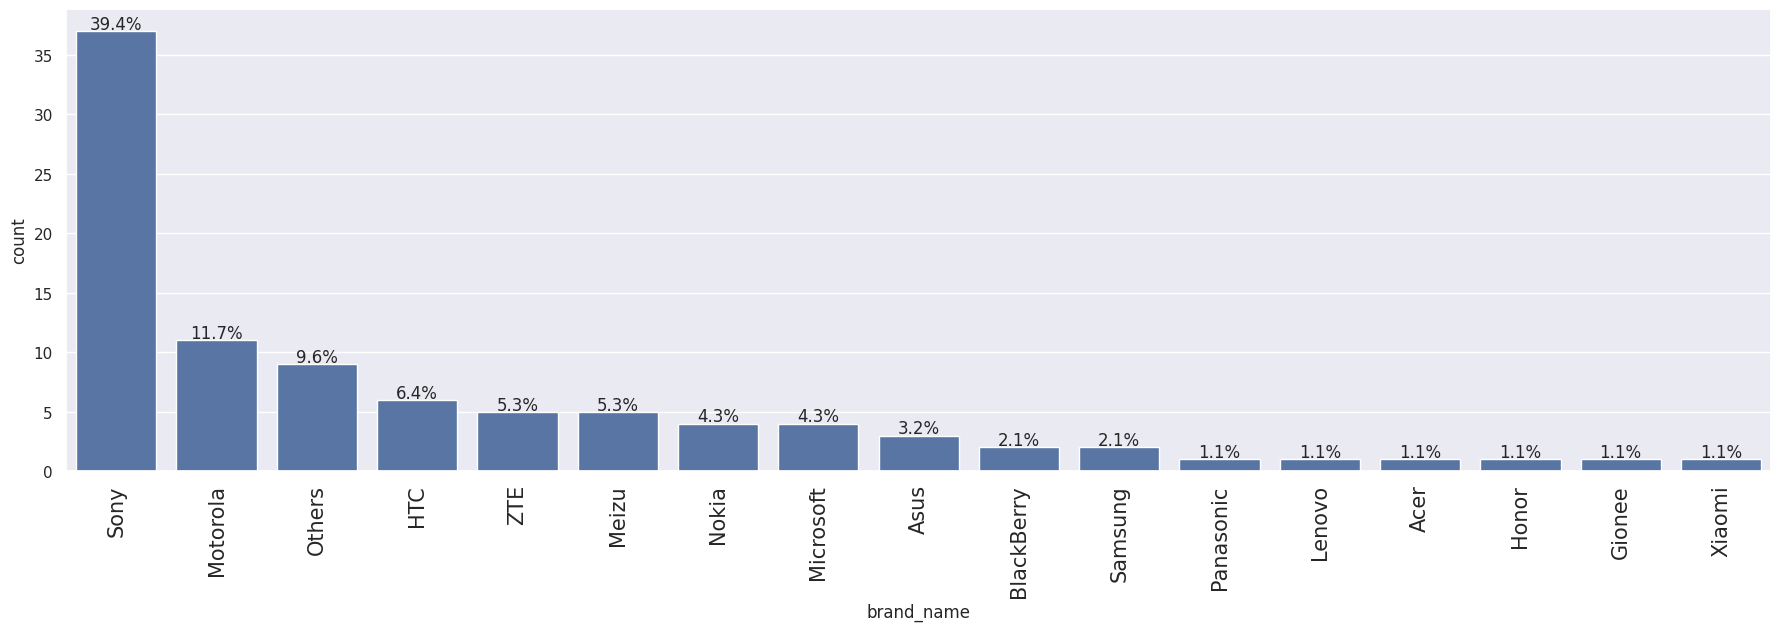

In [49]:
labeled_barplot(df_main_camera, "brand_name", perc=True, n=20)

Observations:

* Sony brand has the highest number of devices with main cameras with more than 16 MP , which takes up 39.4% of the market, followed by Motorola, Others etc..

**Let's see how the price of used devices varies across the years.**

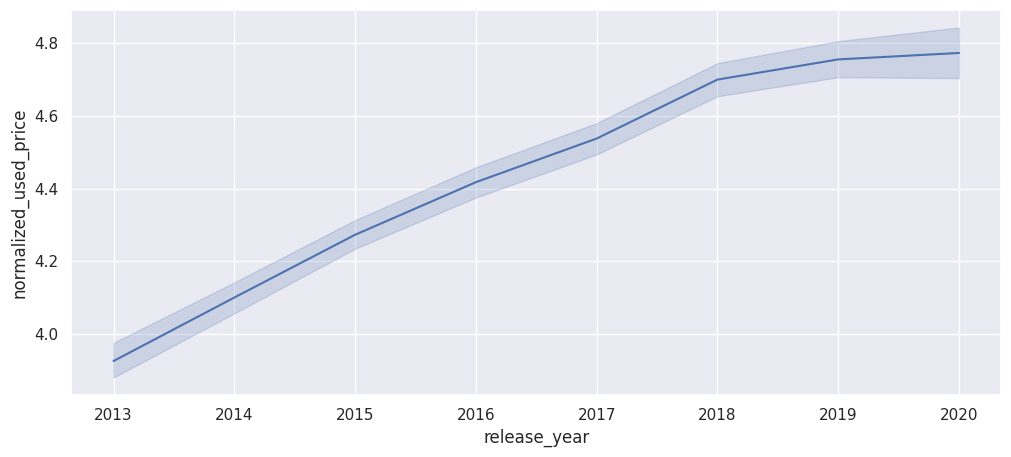

In [50]:
plt.figure(figsize=(12, 5))
sns.lineplot(df, x='release_year', y='normalized_used_price') ## Complete the code to create a lineplot for release year and used price
plt.show()

Observations:

* As the release year of the mobile is recent, the price is higher.

**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

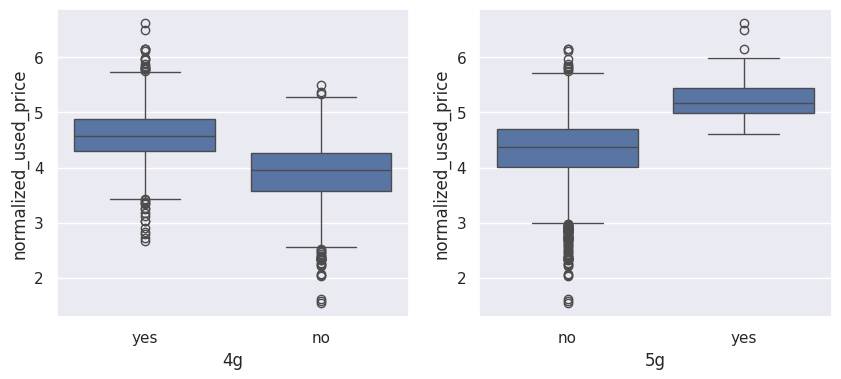

In [51]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

Observations:

The price of the mobiles having 5g is higher than that of having 4g.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Missing value treatment**

In [52]:
# copy of the data
df1 = df.copy()
df1.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


Description:

* There are missing values in the following columns : main_camera_mp, selfie_camera_mp, int_memory, ram, battery & weight.

In [53]:
# Creating list for missing columns
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]
# Imputing missing values in cols_impute with median by grouping the data on release year and brand name
for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year','brand_name'])[col].transform("median")
    )

# checking for missing values
df1.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,0
ram,0
battery,6


Description:

* Most of the columns missing values are imputed. We still need to treat missing values of main_camera_mp, main_camera_mp, battery and weight columns

In [54]:
# Creating list for missing columns
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]
# imputing the missing values in cols_impute with median by grouping the data on brand name

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    )

# checking for missing values
df1.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,10
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


* Now we treat missing values in the column 'main_camera_mp', Other column missing values are imputed.

In [55]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median)

# checking for missing values
df1.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,0
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


* All the missing values are imputed successfully with median.

**Feature engineering**

- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [56]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

,years_since_release
count,3454.000000
mean,5.034742
std,2.298455
min,1.000000
25%,3.000000
50%,5.500000
75%,7.000000
max,8.000000


**Outlier Check**

* Let's check for outliers in the data.

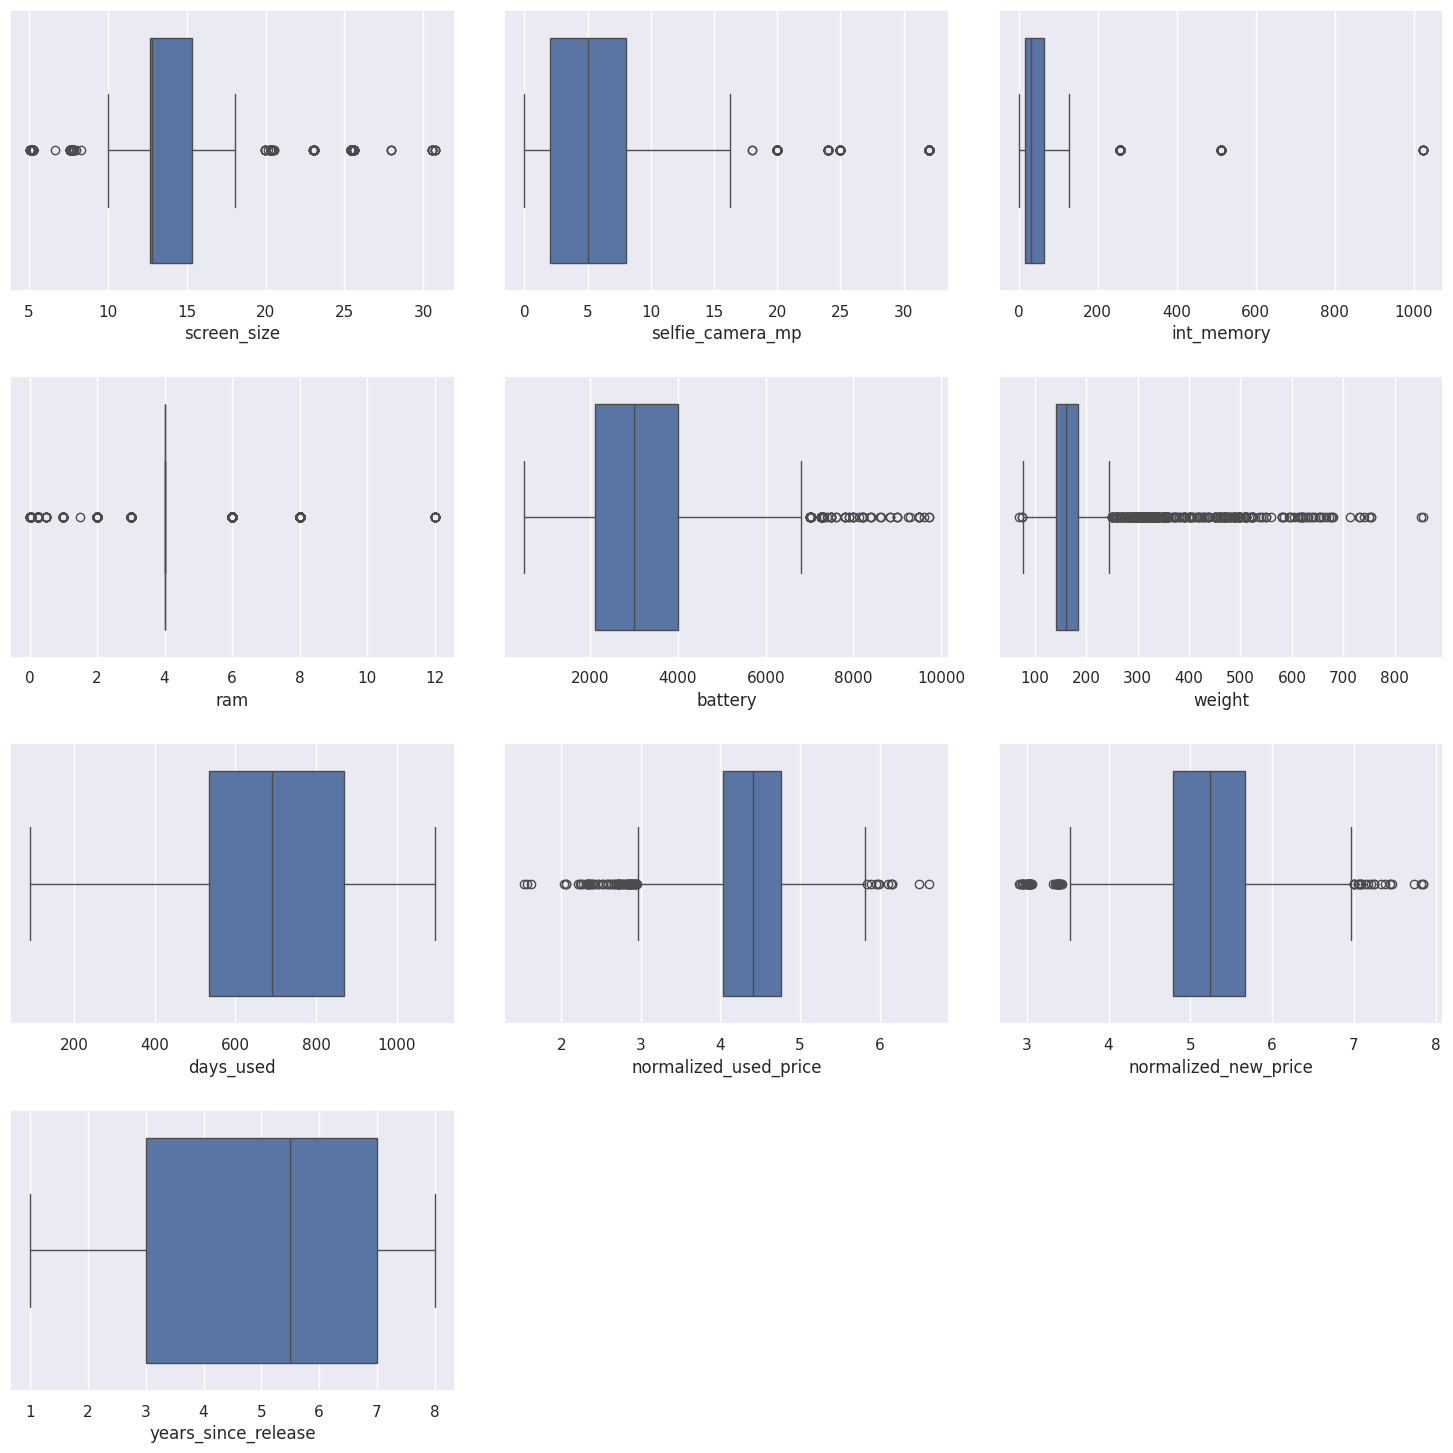

In [57]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

* There are outliers in the dataset.

## Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [58]:
#Split data
# independent variables
X = df1.drop(["normalized_used_price"], axis=1)
# dependent variable
y = df1[["normalized_used_price"]]

In [59]:
print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g main_camera_mp  selfie_camera_mp  \
0      Honor  Android        14.50  yes   no           13.0               5.0   
1      Honor  Android        17.30  yes  yes           13.0              16.0   
2      Honor  Android        16.69  yes  yes           13.0               8.0   
3      Honor  Android        25.50  yes  yes           13.0               8.0   
4      Honor  Android        15.32  yes   no           13.0               8.0   

   int_memory  ram  battery  weight  days_used  normalized_new_price  \
0        64.0  3.0   3020.0   146.0        127              4.715100   
1       128.0  8.0   4300.0   213.0        325              5.519018   
2       128.0  8.0   4200.0   213.0        162              5.884631   
3        64.0  6.0   7250.0   480.0        345              5.630961   
4        64.0  3.0   5000.0   185.0        293              4.947837   

   years_since_release  
0                    1  
1                    1  
2    

In [60]:
# let's add the intercept to data
X = sm.add_constant(X)

In [61]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X = X.astype(float)
X.head()

,const,screen_size,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release,...,main_camera_mp_20.1,main_camera_mp_12.6,main_camera_mp_16.3,main_camera_mp_22.6,main_camera_mp_19.0,main_camera_mp_21.5,main_camera_mp_21.2,main_camera_mp_8.1,main_camera_mp_1.2,main_camera_mp_22.5
0,1.0,14.50,5.0,64.0,3.0,3020.0,146.0,127.0,4.715100,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,17.30,16.0,128.0,8.0,4300.0,213.0,325.0,5.519018,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,16.69,8.0,128.0,8.0,4200.0,213.0,162.0,5.884631,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,25.50,8.0,64.0,6.0,7250.0,480.0,345.0,5.630961,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,15.32,8.0,64.0,3.0,5000.0,185.0,293.0,4.947837,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test =train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [63]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


### Model Building - Linear Regression

In [64]:
# Create a fit OLS model
olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.850
Model:                               OLS   Adj. R-squared:                  0.845
Method:                    Least Squares   F-statistic:                     159.2
Date:                   Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                           18:57:24   Log-Likelihood:                 163.90
No. Observations:                   2417   AIC:                            -159.8
Df Residuals:                       2333   BIC:                             326.6
Df Model:                             83                                         
Covariance Type:               nonrobust                                         
                                                                                                                                                                                    

### Interpretation of R-squared

* The R-squared value tells us that our model can explain 85% of the variance in the training set.
* The coefficient of normalized_new_price is 0.4146.
* const coefficient is 1.6815

## Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [65]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [66]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.226107,0.17736,0.849942,0.844202,NaN


In [67]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1,x_test, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239404,0.185272,0.841094,0.82616,NaN


Observations:

- The training $R^2$ is 0.84.

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict within a mean error of 0.18 on the test data


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

- We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY


- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [68]:
#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif


In [69]:
checking_vif(x_train)

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,feature,VIF
0,const,293.713519
1,screen_size,8.072753
2,selfie_camera_mp,2.897750
3,int_memory,1.434004
4,ram,2.375248
...,...,...
84,main_camera_mp_21.5,1.033344
85,main_camera_mp_21.2,1.059116
86,main_camera_mp_8.1,1.137137
87,main_camera_mp_1.2,1.043345


### Removing Multicollinearity (if needed)



To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [70]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [71]:
col_list = ['screen_size', 'weight', 'brand_name_Apple', 'brand_name_Huawei', 'brand_name_Others', 'brand_name_Samsung', 'os_iOS']
## Checking the effect on model performance after dropping specified columns from train data
res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,os_iOS,0.844667,0.230093
1,brand_name_Others,0.844664,0.230096
2,brand_name_Huawei,0.844653,0.230104
3,brand_name_Apple,0.844631,0.230121
4,brand_name_Samsung,0.844589,0.230151
5,screen_size,0.841532,0.232404
6,weight,0.840428,0.233212


* Dropping os_iOS and check the VIF again.

In [72]:
col_to_drop = 'os_iOS' ## Complete the code to specify the column to drop
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] ## code to specify the train data from which to drop the column specified
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)] ## Code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


VIF after dropping  os_iOS


,feature,VIF
0,const,293.219202
1,screen_size,8.003282
2,selfie_camera_mp,2.889453
3,int_memory,1.433948
4,ram,2.362290
...,...,...
83,main_camera_mp_21.5,1.033341
84,main_camera_mp_21.2,1.059108
85,main_camera_mp_8.1,1.136492
86,main_camera_mp_1.2,1.043312


In [73]:
col_list = ['screen_size', 'weight', 'brand_name_Huawei', 'brand_name_Others', 'brand_name_Samsung']
## check the effect on model performance after dropping specified columns from train data
res = treating_multicollinearity(x_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Others,0.844728,0.230049
1,brand_name_Huawei,0.844717,0.230057
2,brand_name_Samsung,0.844654,0.230103
3,screen_size,0.841586,0.232365
4,weight,0.840475,0.233178


In [74]:
# 'brand_name_Others' column to drop
col_to_drop = 'brand_name_Others'
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]
# Checking VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


VIF after dropping  brand_name_Others


,feature,VIF
0,const,212.850979
1,screen_size,7.952575
2,selfie_camera_mp,2.889414
3,int_memory,1.433523
4,ram,2.361061
...,...,...
82,main_camera_mp_21.5,1.033340
83,main_camera_mp_21.2,1.059108
84,main_camera_mp_8.1,1.136297
85,main_camera_mp_1.2,1.042979


In [75]:
# the columns with high VIF
col_list = ['screen_size', 'weight']
## check the effect on model performance after dropping specified columns from train data
res = treating_multicollinearity(x_train3, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.841606,0.23235
1,weight,0.840541,0.23313


* Dropping weight and checking VIF

In [76]:
# 'weight' column to drop
col_to_drop = 'weight'
x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)] # Check VIF now
vif = checking_vif(x_train4)
print("VIF after dropping ", col_to_drop)
vif

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


VIF after dropping  weight


,feature,VIF
0,const,182.209750
1,screen_size,3.753954
2,selfie_camera_mp,2.859712
3,int_memory,1.431388
4,ram,2.360128
...,...,...
81,main_camera_mp_21.5,1.033226
82,main_camera_mp_21.2,1.059077
83,main_camera_mp_8.1,1.133788
84,main_camera_mp_1.2,1.028433


* All VIF > 5
* No more predictors that have multicollinearity and the assumption is satisfied.

### Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [77]:
# initial list of columns
predictors = x_train4.copy()  ## Complete the code to check for p-values on the right dataset
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'selfie_camera_mp', 'ram', 'normalized_new_price', 'years_since_release', 'brand_name_Nokia', 'brand_name_Samsung', 'brand_name_Xiaomi', '4g_yes', 'main_camera_mp_8.0', 'main_camera_mp_5.0', 'main_camera_mp_3.15', 'main_camera_mp_2.0', 'main_camera_mp_16.0', 'main_camera_mp_0.3', 'main_camera_mp_48.0', 'main_camera_mp_1.3', 'main_camera_mp_23.0', 'main_camera_mp_4.0', 'main_camera_mp_10.0', 'main_camera_mp_6.7', 'main_camera_mp_16.3', 'main_camera_mp_8.1']


In [78]:
# specify the train data from which to select the specified columns
x_train5 = x_train4[selected_features]
# specify the test data from which to select the specified columns
x_test5 = x_test4[selected_features]

In [81]:
olsmodel2 = sm.OLS(y_train, x_train5).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     557.8
Date:                   Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                           19:00:26   Log-Likelihood:                 107.69
No. Observations:                   2417   AIC:                            -167.4
Df Residuals:                       2393   BIC:                            -28.41
Df Model:                             23                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [82]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train5, y_train) ## check performance on train data
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231426,0.181502,0.842797,0.84122,NaN


In [83]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test5, y_test)
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.240476,0.186263,0.839667,0.835864,NaN


Observations
* Now no feature has p-value greater than 0.05, so we'll consider the features in x_train5 as the final set of predictor variables and olsmod2 as the final model to move forward with
* Now adjusted R-squared is 0.841, i.e., our model is able to explain ~84% of the variance
* The adjusted R-squared in olsmod1(where we considered the variables without multicollinearity) was 0.845
* This shows that the variables we dropped were not affecting the model significantly
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE


- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [84]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.870343,0.217145
1525,4.448399,4.585538,-0.137139
1128,4.315353,4.293276,0.022077
3003,4.282068,4.260293,0.021775
2907,4.456438,4.456145,0.000293


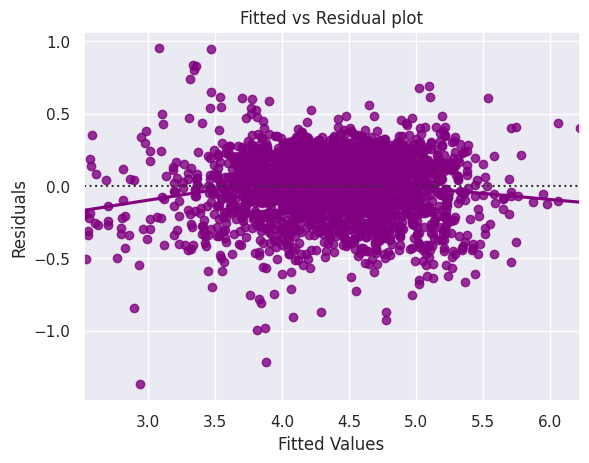

In [85]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The assumptions of linearity and independence are satisfied as we see no pattern in the above plot.

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

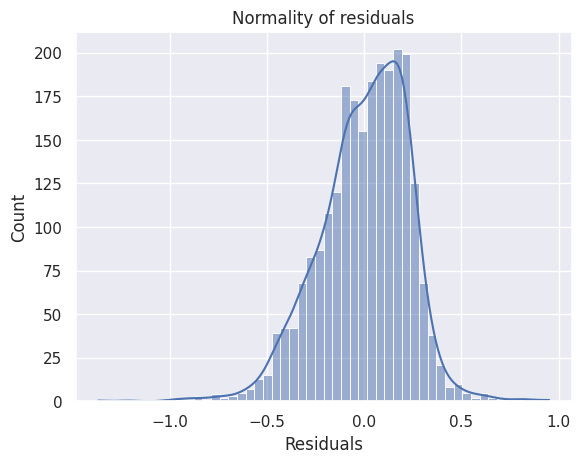

In [86]:
# code to plot the distribution of residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

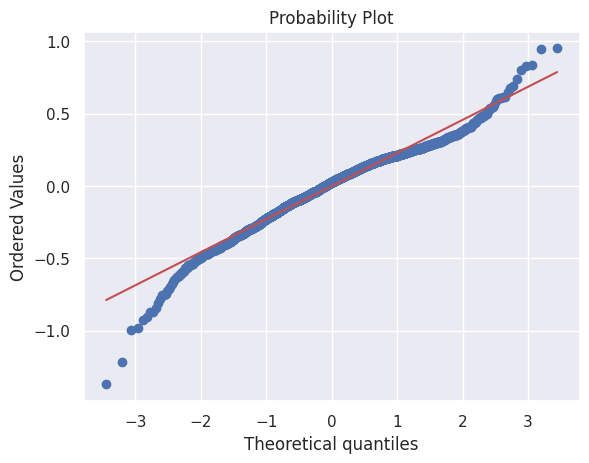

In [87]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab) ## code check Q-Q plot
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [88]:
stats.shapiro(df_pred["Residuals"]) ## Complete the code to apply the Shapiro-Wilks test

ShapiroResult(statistic=0.9747344182469264, pvalue=2.880682896208712e-20)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY



- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [89]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train5) ## Complete the code with the right train data to apply the Goldfeldquandt test
lzip(name, test)

[('F statistic', 1.0622319654059909), ('p-value', 0.14943725564900745)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Final Model

Let's recreate the final model and print it's summary to gain insights.

In [90]:
x_train_final = x_train5.copy()
x_test_final = x_test5.copy()

In [91]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     557.8
Date:                   Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                           19:00:56   Log-Likelihood:                 107.69
No. Observations:                   2417   AIC:                            -167.4
Df Residuals:                       2393   BIC:                            -28.41
Df Model:                             23                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [92]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train_final, y_train)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231426,0.181502,0.842797,0.84122,NaN


In [93]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.240476,0.186263,0.839667,0.835864,NaN


* The model is able to explain 84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

## Actionable Insights and Recommendations

* The model is able to explain ~84% of the variation in the data

* normalized_new_price & normalized_used_price are strongly correlated so the price of used devices increases as the price of new device gets increased.

* screen_size, selfie_camera_mp, int_memory, ram, normalized_new_price, some brands, and 4G have Positive coefficients. That means, as these attributes increases price of device increase too.

* brand_name_Samsung have strong negative coefficient. That means, as these attributes increases price of device decreases.

___